In [ ]:
# to extract the database
from google.colab import drive  
# to access the content
drive.mount('/content/drive')

In [ ]:
# importing numpy library for numerical data
import numpy as np
# for performuing operation
import pandas as pd
# for defining the path
from pathlib import Path
# for path
import os.path
# for visualisation
import matplotlib.pyplot as plt
# to visualize the image
from IPython.display import Image, display
# to import c_m
import matplotlib.cm as cm
#importing t_f
import tensorflow as tf 

import os
# importing crucial library
import shutil
from tqdm import tqdm
# importing for reshuffling
from random import shuffle

import cv2
# accessing the lib
import glob
# importing keras library
from tensorflow.keras import backend as K
import random
# accessing for randomly selection
import albumentations as A
# to divide the database
from sklearn.model_selection import train_test_split, StratifiedKFold
# importing models layer
from tensorflow.keras.layers import *
# for optimizer
from tensorflow.keras.optimizers import *
# for making new models
from tensorflow.keras.models import *
# for preprocessing
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
# for model
from tensorflow.keras.applications.efficientnet import *


In [ ]:
flower_data=glob.glob("/content/drive/MyDrive/Rajatgupta/image_classification/NewFolder/flowers/*/*") 
# loading data set 

In [ ]:
len(flower_data) 
# to check the length of the dataset

4317

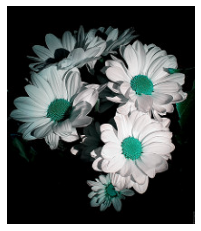

In [ ]:
#showing image  
img=cv2.imread(flower_data[35]) 
# to print the image in a frame
plt.imshow(img)
# to reduce the action of axis
plt.axis('off') 
# to display the image 
plt.show()

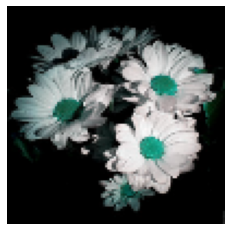

In [ ]:
#to resize the image 
img_resize=cv2.resize(img,(100,100))
# to display the image 
plt.imshow(img_resize,cmap="gray")
# to reduce the effect of the axis
plt.axis('off') 
# for printing the image 
plt.show()

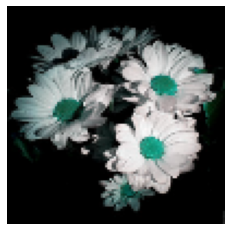

In [ ]:
# for changing the background color of the image 2 rgb 
image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
# to display an image in a window 
plt.imshow(img_resize,cmap="gray") # showing image 
plt.axis('off')
# to display the image 
plt.show()

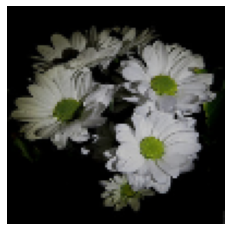

In [ ]:
# initialization of normalization
image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
# to normalize the picture 
plt.imshow(image_norm)
# to display an image in a window
plt.axis('off') 
# to print the image
plt.show()

In [ ]:
cls=flower_data[4].split(os.path.sep)[-2] 
# to get the information about the class

In [ ]:
cls # to check the data present inside that class

'daisy'

In [ ]:
data=[]  # creating a dummy variable which will contain all the data
labels=[]  # to create the labels 
for i in tqdm (range(len(flower_data))): 
  # to select the random image 
    try:
        img= cv2.imread(flower_data[i]) 
        # to select the particular picture
        img_resize=cv2.resize(img,(224,224)) 
        # resizing the size of the image 
        image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
        # defining the color  
        image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
        # to normalize the data
        data.append(image_norm) 
        # increasing the image number by one 
        classes=flower_data[i].split(os.path.sep)[-2]   
        # classes for defining the categories 
        if classes=='daisy': # first class
            label=0
        elif classes=='dandelion': # second class
            label=1
        elif classes=='rose':  # third class
            label=2
        elif classes=='sunflower': # fourth class
            label=3
        elif classes=='tulip':  # fifth class
            label=4
        labels.append(label)
    except:
        continue

100%|██████████| 4317/4317 [17:57<00:00,  4.01it/s]


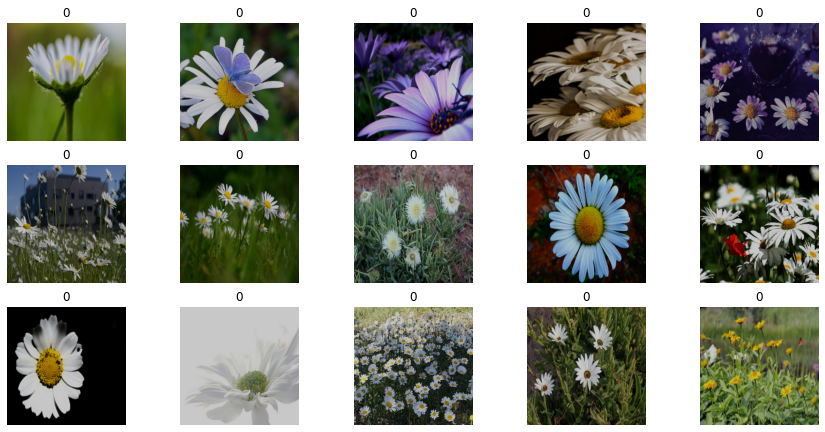

In [ ]:
# for the visualization of an image
plt.figure(figsize=(15,10))
# defining the picture range
for i in range(15):
    # defining the subplot 
    plt.subplot(4,5,i+1)
    # to display an image on a window
    plt.imshow(data[i],cmap ='gray')
    # for better understanding adding titles
    plt.title(labels[i])
    # reducing the changement of axis
    plt.axis("off")

In [ ]:
len(data) # for checking the length

4317

In [ ]:
len(labels) # to know about the data of labels

4317

In [ ]:
data=np.array(data) 
#to transform database into an array
labels=np.array(labels) 
#to transform labels into an array

In [ ]:
# to get the size 
data.shape,labels.shape

((4317, 224, 224, 3), (4317,))

In [ ]:
 # dividation of the database 
Flower_X_TRAIN, Flower_X_TEST, Flower_Y_TRAIN, Flower_Y_TEST = train_test_split(data, labels, test_size=0.200370627, random_state=1)

Flower_X_TRAIN, Flower_X_VAL, Flower_Y_TRAIN, Flower_Y_VAL = train_test_split(Flower_X_TRAIN, Flower_Y_TRAIN, test_size=0.125432100, random_state=1)

In [ ]:
# printing  x train and test shape 
print(Flower_X_TRAIN.shape,Flower_Y_TRAIN.shape)
# checking the figure of train variable 
print(Flower_X_TEST.shape,Flower_Y_TEST.shape)
# checking the figure of test
print(Flower_X_VAL.shape,Flower_Y_VAL.shape)
# checking the figure of validation 

(3019, 224, 224, 3) (3019,)
(865, 224, 224, 3) (865,)
(433, 224, 224, 3) (433,)


In [ ]:
# transform to categories 
from tensorflow.keras.utils import to_categorical, plot_model
# trained categories
Flower_Y_TRAIN = to_categorical(Flower_Y_TRAIN)
# test categories
Flower_Y_TEST = to_categorical(Flower_Y_TEST)
# valid categories
Flower_Y_VAL= to_categorical(Flower_Y_VAL)

In [ ]:
# printing y train and test shape 
print(Flower_Y_TRAIN.shape,Flower_Y_TEST.shape,Flower_Y_VAL.shape)

(3019, 5) (865, 5) (433, 5)


In [ ]:
# define color containing variable
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr', 'BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r', 'ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r', 'Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r', 'RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r', 'nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

# **VGG-16**

In [ ]:
import keras,os
# importing library
from keras.models import Sequential
# importing basic required layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
# importing the model
from keras.models import Model
# importing the basic 
from keras import optimizers , layers, applications
#importing vgg16 model
from tensorflow.keras.applications import VGG16

In [ ]:
#initializing the algorithm
vgg16 = VGG16(input_shape = (224,224,3),weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  # making the trainable layer in vgg 19 as false.
    layer.trainable = False 

In [ ]:
# defining the last layer
last_layer = vgg16.get_layer('block5_pool')
# to add the result layer
last_output = last_layer.output
# adding a layer to combined into fixed shape
x = GlobalMaxPooling2D()(last_output)
# Adding a hidden layer
x = Dense(512, activation='relu')(x)
# Adding a layer of dropout
x = Dropout(0.5)(x)
# adding an output layer
x = Dense(5, activation='softmax')(x)

In [ ]:
vgg16_model1 = Model(vgg16.input, x) 
# initializing the model

In [ ]:
 # to debug the algorithm
 vgg16_model1.compile(loss='categorical_crossentropy',   
                # debugging the algorithm
             optimizer='Adam',
             # initializing the optimizer
              metrics=['accuracy'])

In [ ]:
vgg16_model1.summary() # function to show the summary

In [ ]:
#to trained the algorithm
history = vgg16_model1.fit(Flower_X_TRAIN,Flower_Y_TRAIN,
          epochs = 20, # defining the iterations 
          validation_data = (Flower_X_VAL,Flower_Y_VAL),
          batch_size = 32 )

In [ ]:
# to import the c_r
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# importing basic library of c_m
pred1 = vgg16_model1.predict(Flower_X_TEST)
# initializing predict variable
pred1_T = vgg16_model1.predict(Flower_X_TRAIN)


In [ ]:
print(classification_report(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1))) 
print() # for testing score
print('Testing Accuracy : ', accuracy_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1)))
print() # for training score
print('Training Accuracy : ', accuracy_score(np.argmax(Flower_Y_TRAIN, axis=1), np.argmax(pred1_T, axis=1)))

In [ ]:
# importing some important functions
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the f2 score

Precision by RF of testing data is: 0.846
Recall by RF of testing data is: 0.846
F1 score by RF of testing data is: 0.846


In [ ]:
# importing cm
from sklearn.metrics import confusion_matrix 
# initializing the c_m
cm = confusion_matrix(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred1, axis=1))

Text(69.0, 0.5, 'Original Values')

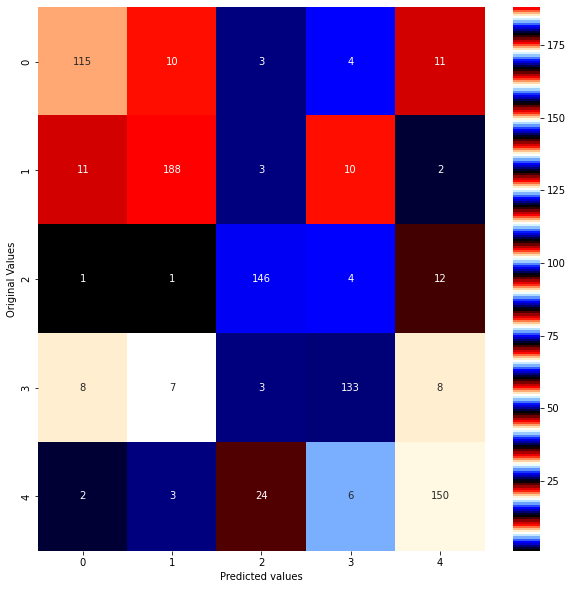

In [ ]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

# **VGG-19**

In [ ]:
import keras,os
# importing first layer 
from keras.models import Sequential
# adding some important sheet
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
# importing the algorithm
from keras.models import Model
# adding basics function
from keras import optimizers , layers, applications
# importing an algorithm
from tensorflow.keras.applications import VGG19 #importing vgg19 model

In [ ]:
#initializing the model
vgg = VGG19(input_shape = (224,224,3),weights = "imagenet", include_top = False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
# for changing the functionility of the layers 
for layer in vgg.layers:
  # making the trainable layer in vgg 19 as false.
    layer.trainable = False 


In [ ]:
#defining the last layer
last_layer = vgg.get_layer('block5_pool')
# defining the output layer
last_output = last_layer.output
# to combined the layers into fixed dimensions 
x = GlobalMaxPooling2D()(last_output)
# adding a hidden / dense layer
x = Dense(512, activation='relu')(x)
# adding a layer of dropout
x = Dropout(0.5)(x)
# making an result sheet 
x = Dense(5, activation='softmax')(x)

In [ ]:
vgg19_model2 = Model(vgg.input, x) 
# initializing the model

In [ ]:
# debugging the model
vgg19_model2.compile(loss='categorical_crossentropy',
             optimizer='Adam', # defining the optimizer
              metrics=['accuracy'])

In [ ]:
vgg19_model2.summary() 
# function to show the summary

In [ ]:
#to trained the model
history = vgg19_model2.fit(Flower_X_TRAIN,Flower_Y_TRAIN,
          epochs = 20, # iterations size
          validation_data = (Flower_X_VAL,Flower_Y_VAL),
          batch_size = 32 )

In [ ]:
# importing c_r
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# importing libraries of C_M and C_R
pred2 = vgg19_model2.predict(Flower_X_TEST)
# prediction variable for testing
pred2_T = vgg19_model2.predict(Flower_X_TRAIN)
# initializing the predict variable for training

In [ ]:
print(classification_report(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1)))  # C_R
print() # testing score
print('Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1)))
print() # trainiing score
print('Training Accuracy : ', accuracy_score(np.argmax(Flower_Y_TRAIN, axis=1), np.argmax(pred2_T, axis=1)))

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the f2 score

Precision by RF of testing data is: 0.802
Recall by RF of testing data is: 0.802
F1 score by RF of testing data is: 0.802


In [ ]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
# initializing the c_m
cm1 = confusion_matrix(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred2, axis=1))

Text(69.0, 0.5, 'Original Values')

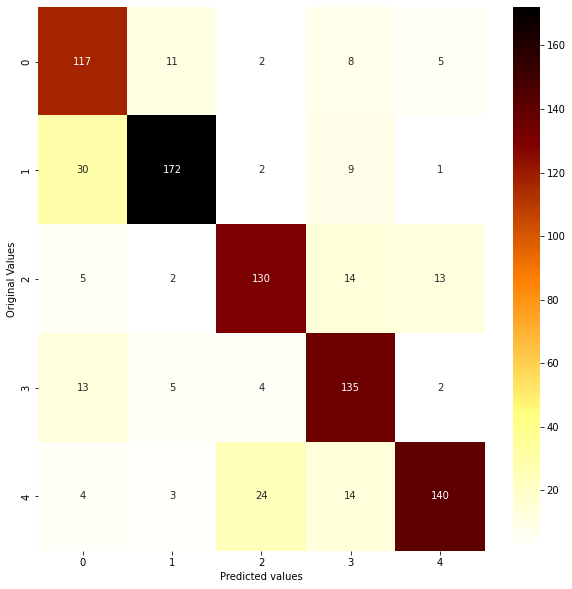

In [ ]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm1,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

# **DenseNet201**

In [ ]:
from keras import layers
# importing layers 
from keras.models import Sequential
# importing optimizer
from tensorflow.keras.optimizers import Adam, RMSprop
# importing model
from tensorflow.keras.applications import DenseNet201
# for dividation into categories
from keras.utils.np_utils import to_categorical
# importing basic layers 
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
# for preprocessing the data
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

In [ ]:
def build_model():  # to construct the DenseNet model
    base_model = DenseNet201(input_shape=(224, 224, 3), # defining the shape
                                     weights='imagenet',
                                     include_top=False,
                                     pooling='Avg', # TO add pooling
                                     classes=5  # initialize the classes)
    for layer in base_model.layers:
      # chnging some functionality
      layer.trainable = False

    x = base_model.output
    # adding activation
    x = Activation('relu')(x)
    # adding layer to compact the database
    x = Flatten()(x)
    # adding some hidden layer
    x = Dense(2048,activation='relu')(x)
    # adding deep sheet
    x = Dense(1024,activation='relu')(x)
    # adding hidden layer
    x = Dense(512,activation='relu')(x)
    # adding deep sheet
    x = Dense(256,activation='relu')(x)
    # adding hidden layer
    x = Dense(128,activation='relu')(x)
    # defining result layer
    predictions = Dense(5, activation='softmax')(x)
    # defining the model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model
# building the model
DN201_model3 = build_model()

In [ ]:
# to debug
DN201_model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['Accuracy'])  # to compile the model

In [ ]:
DN201_model3.summary() 
# to print the summary of the model

In [ ]:
# to trained the model 
H = DN201_model3.fit(
    Flower_X_TRAIN,
    Flower_Y_TRAIN,
    batch_size=32, 
    epochs=20, # defining the num of iterations 
    validation_data=(Flower_X_VAL, Flower_Y_VAL)) #Model Training

In [ ]:
# importing c_r
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred3 = DN201_model3.predict(Flower_X_TEST)
# predict variable of testing
pred3_T = DN201_model3.predict(Flower_X_TRAIN)
# declaring the predict variable

In [ ]:
# for basics information
print(classification_report(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1))) 
print() # testing score
print('Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1)))
print() # training score
print('Training Accuracy : ', accuracy_score(np.argmax(Flower_Y_TRAIN, axis=1), np.argmax(pred3_T, axis=1)))

In [ ]:
# importing basic function
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by DN of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the precision value
print('Recall by DN of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the recall value
print('F1 score by DN of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the f2 score

Precision by DN of testing data is: 0.746
Recall by DN of testing data is: 0.746
F1 score by DN of testing data is: 0.746


In [ ]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
# initializing the cm
cm2 = confusion_matrix(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred3, axis=1))

Text(69.0, 0.5, 'Original Values')

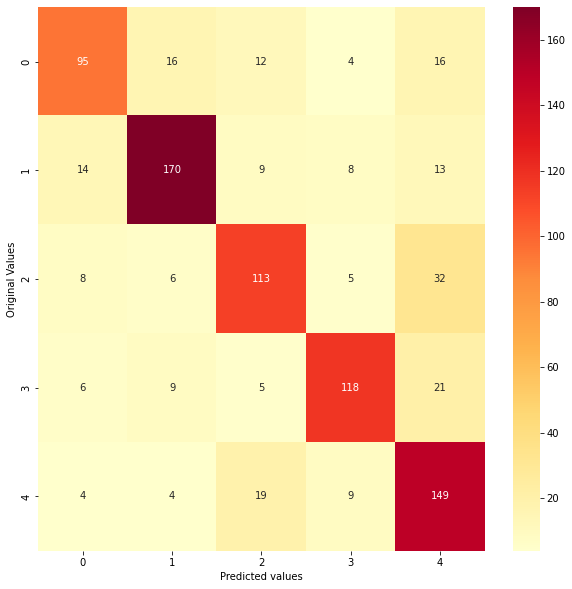

In [ ]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm2,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

# **InceptionResNetV2**

In [ ]:
import keras,os
# importing basic libraries
from keras.models import Sequential
# importing basic layers 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
# importing model
from keras.models import Model
# importing optimizer
from keras import optimizers , layers, applications
# importing the inceptionnet 
from tensorflow.keras.applications import InceptionResNetV2  #importing vgg16 model

In [ ]:
#building the model
IRV3_model4 = Sequential()
# initializing the algorithm
base = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3), # defining the shape
)
IRV3_model4.add(base)
# adding flatten layer to squeeze the data into fixed shape 
IRV3_model4.add(layers.Flatten())
# adding hidden layer
IRV3_model4.add(layers.Dense(256, activation='relu'))
# defining the output layer
IRV3_model4.add(layers.Dense(5, activation='softmax'))

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
# to debug the model
IRV3_model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
IRV3_model4.summary() # function to show the summary

In [ ]:
#to trained the model
history = IRV3_model4.fit(Flower_X_TRAIN,Flower_Y_TRAIN,
          epochs = 20, # defining the num of iterations
          validation_data = (Flower_X_VAL,Flower_Y_VAL),
          batch_size = 32 )

In [ ]:
# accesing the basic terminology
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# defining the predict variable
pred4 = IRV3_model4.predict(Flower_X_TEST)
# pred variable for testing
pred4_T = IRV3_model4.predict(Flower_X_TRAIN)
# pred variable for training

In [ ]:
print(classification_report(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1)))  # for c_m or c_r
print()
print(' Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1)))
print()
print('Training Accuracy : ', accuracy_score(np.argmax(Flower_Y_TRAIN, axis=1), np.argmax(pred4_T, axis=1))) #Training Accuracy

In [ ]:
# importing basic function of c_r
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1),average='micro')) 
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1),average='micro')) 
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1),average='micro')) 
# checking the f2 score

Precision by RF of testing data is: 0.917
Recall by RF of testing data is: 0.917
F1 score by RF of testing data is: 0.917


In [ ]:
# importing cm
from sklearn.metrics import confusion_matrix
# initializing the cm
cm3 = confusion_matrix(np.argmax(Flower_Y_TEST, axis=1), np.argmax(pred4, axis=1))

Text(69.0, 0.5, 'Original Values')

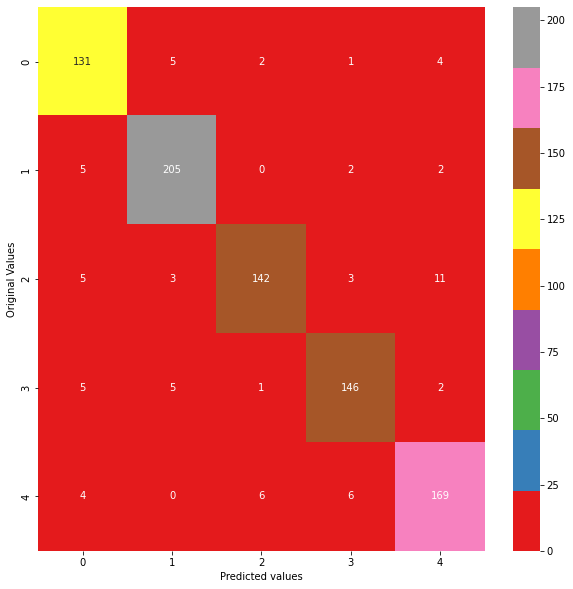

In [ ]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm3,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

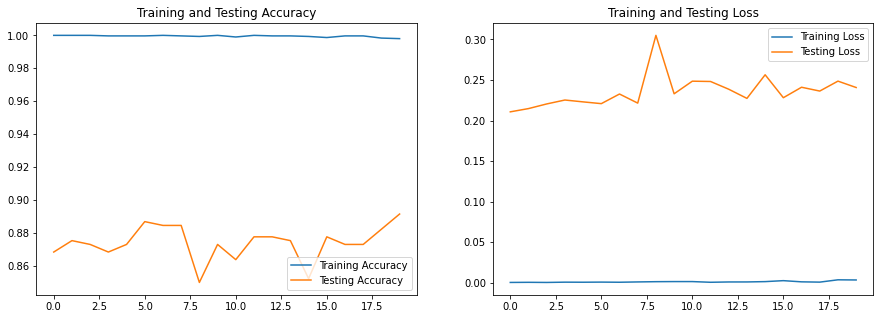

In [ ]:
#to plot the score comparison graph 
acc = history.history['accuracy']
# adding the simple accuracy
val_acc = history.history['val_accuracy']
# ploting the loss graph
loss = history.history['loss']
# adding the val loss
val_loss = history.history['val_loss']
# defining range
epochs_range = range(20)
# defining the size
plt.figure(figsize=(15, 5))
# defining the subplot
plt.subplot(1, 2, 1)
# defining the range of training score
plt.plot(epochs_range, acc, label='Training Accuracy')
# defining the range of testing score
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
# resulting score 
plt.legend(loc='lower right')
# adding the specified title 
plt.title('Training and Testing Accuracy')
# defining subplot
plt.subplot(1, 2, 2)
# adding the range of loss
plt.plot(epochs_range, loss, label='Training Loss')
# adding the range of testing loss
plt.plot(epochs_range, val_loss, label='Testing Loss')
# defining the loss iterations range 
plt.legend(loc='upper right')
# defining the title of loss
plt.title('Training and Testing Loss')
# to display the graph
plt.show()